#Hate Speech Data Preprocessing

# 1. Load the Dataset

This is done using Pandas

In [ ]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('HateSpeech_Kenya.csv')

# Display basic information about the dataset, such as column types and missing values
df.info()

# Preview the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hate_speech         48076 non-null  int64 
 1   offensive_language  48076 non-null  int64 
 2   neither             48076 non-null  int64 
 3   Class               48076 non-null  int64 
 4   Tweet               48076 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.8+ MB


,hate_speech,offensive_language,neither,Class,Tweet
0,0,0,3,0,['The political elite are in desperation. Ordi...
1,0,0,3,0,"[""Am just curious the only people who are call..."
2,0,0,3,0,['USERNAME_3 the area politicians are the one ...
3,0,0,3,0,['War expected in Nakuru if something is not d...
4,0,0,3,0,['USERNAME_4 tells kikuyus activists that they...


# 2. Data Cleaning

- Check and handle missing values
- Remove the duplicates
- Normalize the text data

In [ ]:
import re

# Define a function to clean the tweets
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove mentions, hashtags, special characters, and digits
    text = re.sub(r'\@\w+|\#|\d+|[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the text cleaning function
df['cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# Add a new column for the length of each tweet
df['text_length'] = df['cleaned_Tweet'].apply(len)

# Preview the cleaned tweets
df[['Tweet', 'cleaned_Tweet', 'text_length']].head()


,Tweet,cleaned_Tweet,text_length
0,['The political elite are in desperation. Ordi...,the political elite are in desperation ordinar...,92
1,"[""Am just curious the only people who are call...",am just curious the only people who are callin...,135
2,['USERNAME_3 the area politicians are the one ...,username_ the area politicians are the one to ...,131
3,['War expected in Nakuru if something is not d...,war expected in nakuru if something is not don...,107
4,['USERNAME_4 tells kikuyus activists that they...,username_ tells kikuyus activists that they ar...,115


# 3. Exploratory Data Analysis (EDA)
Class Distribution - Visualize the distribution of hate speech vs non-hate speech

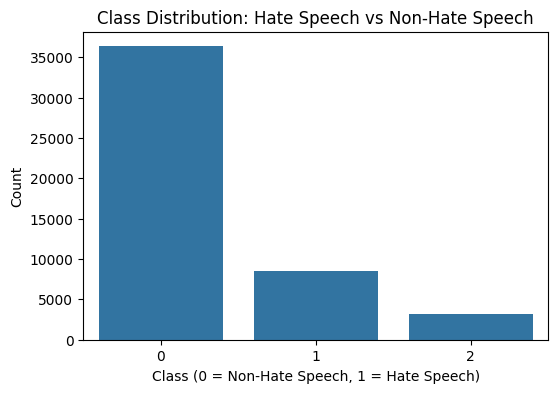

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target classes (hate speech vs non-hate speech)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Hate Speech vs Non-Hate Speech')
plt.xlabel('Class (0 = Non-Hate Speech, 1 = Hate Speech)')
plt.ylabel('Count')
plt.show()

Text Length Distribution - Visualize the distibution of the text length (number of characters) for both hate and non-hate speech

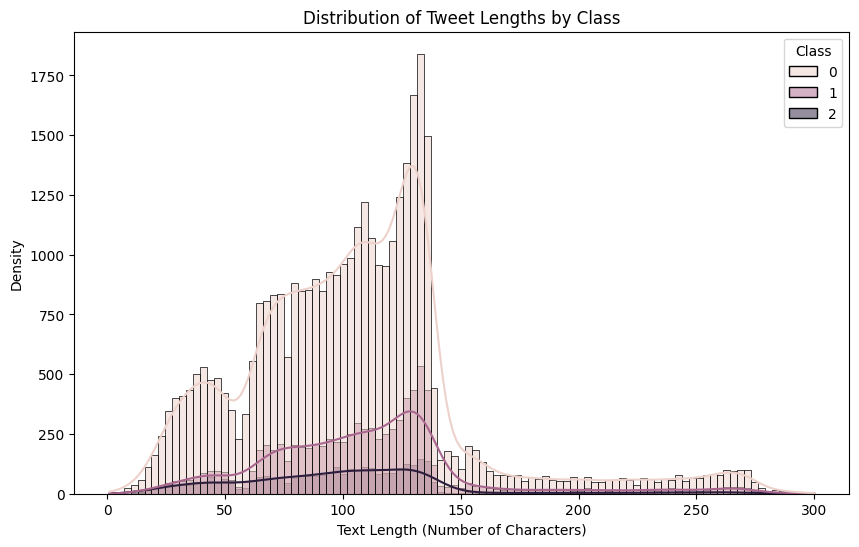

In [ ]:
# Plot the distribution of text lengths, colored by the class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='Class', kde=True)
plt.title('Distribution of Tweet Lengths by Class')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Density')
plt.show()

Word Cloud for Hate Speech - create a word cloud for tweets classified as hate speech

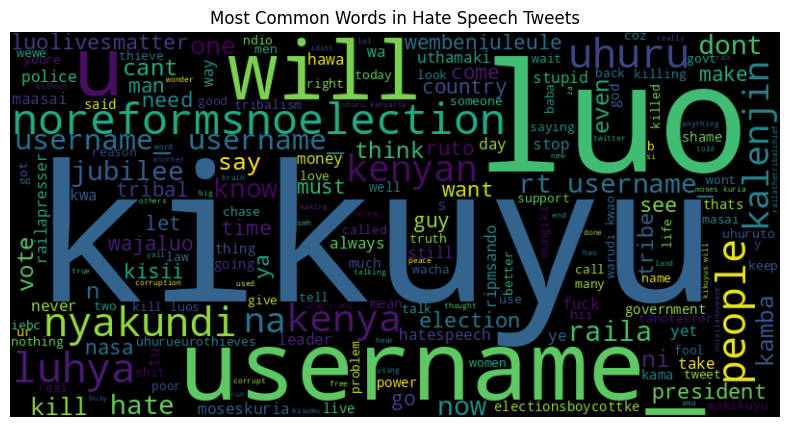

In [ ]:
from wordcloud import WordCloud

# Generates a word cloud for hate speech (Class = 1)
hate_speech_tweets = df[df['Class'] == 1]['cleaned_Tweet']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(hate_speech_tweets))

# Displays the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Hate Speech Tweets')
plt.show()